# Import and Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df = pd.read_csv('/content/investasi_2010-2025.csv')

In [ ]:
df.head()

,period,investment_status,region,country,main_sector,sector_name,kbli_2digit,province,district_city,java_outside_java,island,investment_idr_million,investment_usd_thousand,indonesian_workers,year,quarter
0,2010-Q1,PMA,Afrika,Mauritania,Sektor Sekunder,Industri Makanan,(10-2015) Industri makanan,Kalimantan Tengah,Kabupaten Seruyan,Luar Jawa,Kalimantan,279631.2,29748.0,0,2010,Q1
1,2010-Q1,PMA,Afrika,Mauritius,Sektor Tersier,Perdagangan dan Reparasi,"(46-2015) Perdagangan besar, bukan mobil dan s...",Nusa Tenggara Barat,Kota Mataram,Luar Jawa,Bali dan Nusa Tenggara,0.0,0.0,44,2010,Q1
2,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,Pertambangan,(06-2015) Pertambangan minyak bumi dan gas ala...,Riau,Kabupaten Bengkalis,Luar Jawa,Sumatera,2265.3,241.0,692,2010,Q1
3,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Kalimantan Barat,Kabupaten Sanggau,Luar Jawa,Kalimantan,0.0,0.0,110,2010,Q1
4,2010-Q1,PMA,Afrika,Seychelles,Sektor Primer,"Tanaman Pangan, Perkebunan, dan Peternakan","(01-2015) Pertanian tanaman, peternakan, perbu...",Nusa Tenggara Barat,Kabupaten Lombok Barat,Luar Jawa,Bali dan Nusa Tenggara,0.0,0.0,90,2010,Q1


# Data Pre Processing

In [ ]:
# Cek Data null
df.isnull().sum()

,0
period,0
investment_status,0
region,0
country,0
main_sector,0
sector_name,0
kbli_2digit,0
province,0
district_city,0
java_outside_java,0


In [ ]:
# Cek data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604679 entries, 0 to 604678
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   period                   604679 non-null  object 
 1   investment_status        604679 non-null  object 
 2   region                   604679 non-null  object 
 3   country                  604679 non-null  object 
 4   main_sector              604679 non-null  object 
 5   sector_name              604679 non-null  object 
 6   kbli_2digit              604679 non-null  object 
 7   province                 604679 non-null  object 
 8   district_city            604679 non-null  object 
 9   java_outside_java        604679 non-null  object 
 10  island                   604679 non-null  object 
 11  investment_idr_million   604679 non-null  float64
 12  investment_usd_thousand  604679 non-null  float64
 13  indonesian_workers       604679 non-null  int64  
 14  year

In [ ]:
# Hapus Data Duplikat
print("Jumlah duplikat:", df.duplicated().sum())

# hapus duplikat
df = df.drop_duplicates()

Jumlah duplikat: 32700


In [ ]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571979 entries, 0 to 604678
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   period                   571979 non-null  object 
 1   investment_status        571979 non-null  object 
 2   region                   571979 non-null  object 
 3   country                  571979 non-null  object 
 4   main_sector              571979 non-null  object 
 5   sector_name              571979 non-null  object 
 6   kbli_2digit              571979 non-null  object 
 7   province                 571979 non-null  object 
 8   district_city            571979 non-null  object 
 9   java_outside_java        571979 non-null  object 
 10  island                   571979 non-null  object 
 11  investment_idr_million   571979 non-null  float64
 12  investment_usd_thousand  571979 non-null  float64
 13  indonesian_workers       571979 non-null  int64  
 14  year     

In [ ]:
df_group = df.groupby("period")["investment_idr_million"].sum().reset_index()
df_group['date'] = pd.PeriodIndex(df_group['period'], freq='Q').to_timestamp()
df_group = df_group.set_index('date')
df_group

,period,investment_idr_million
date,,
2010-01-01,2010-Q1,4.219818e+07
2010-04-01,2010-Q2,5.082613e+07
2010-07-01,2010-Q3,5.676258e+07
2010-10-01,2010-Q4,5.897947e+07
2011-01-01,2011-Q1,5.362759e+07
...,...,...
2024-04-01,2024-Q2,4.284092e+08
2024-07-01,2024-Q3,4.314768e+08
2024-10-01,2024-Q4,4.527962e+08


# Exploratory Data Analysis

## Trend Analysis

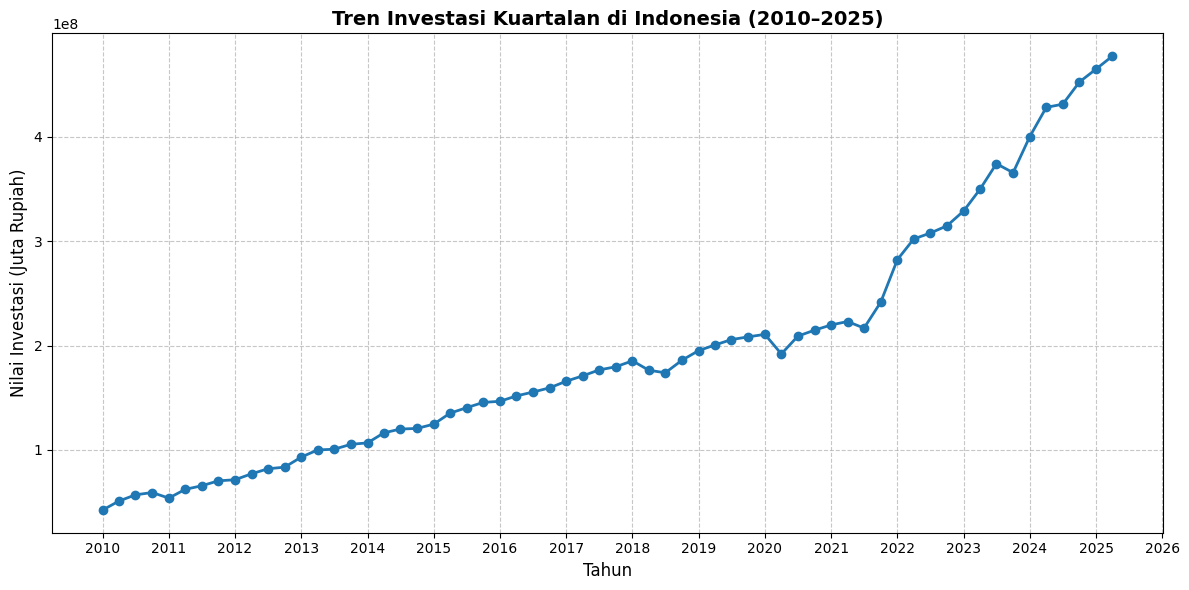

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
plt.plot(df_group.index, df_group['investment_idr_million'], marker='o', linewidth=2)

plt.title("Tren Investasi Kuartalan di Indonesia (2010–2025)", fontsize=14, fontweight='bold')
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Nilai Investasi (Juta Rupiah)", fontsize=12)

# Atur ticks di sumbu X per tahun
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()





## Seasonality Analysis

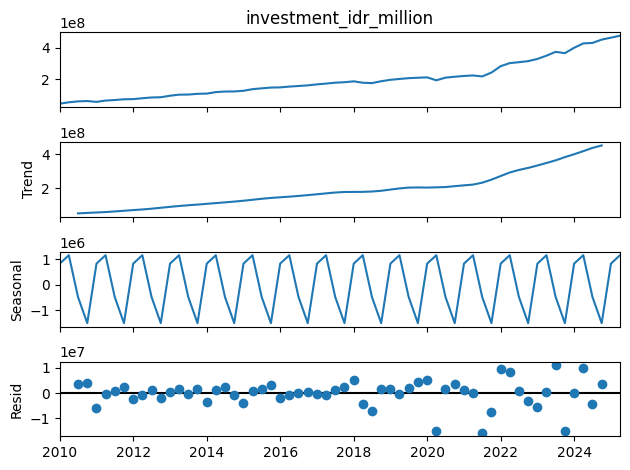

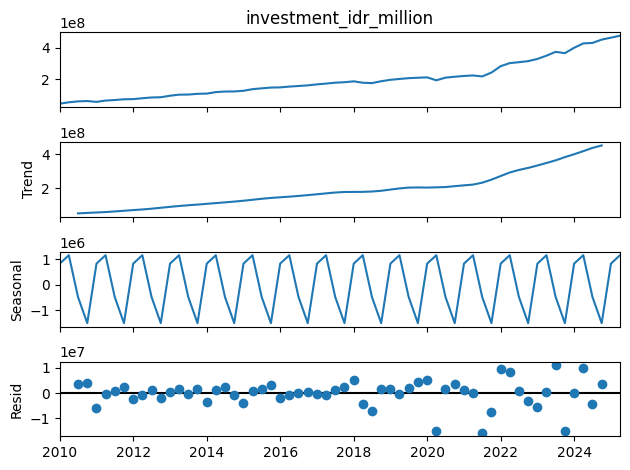

In [ ]:
result = seasonal_decompose(df_group['investment_idr_million'], model='additive', period=4)
result.plot()


## Quarterly Pattern (Boxplot / Grouping)

<Axes: xlabel='quarter', ylabel='investment_idr_million'>

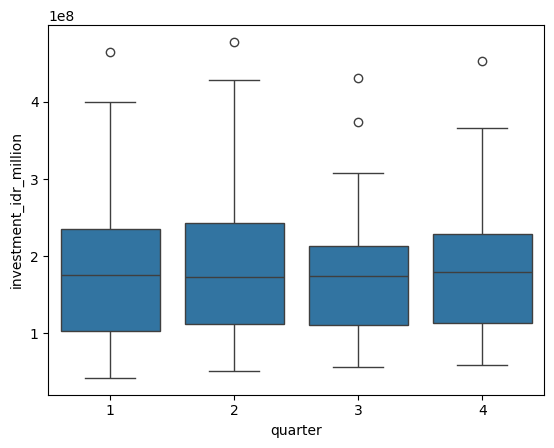

In [ ]:
df_group['quarter'] = df_group.index.quarter
sns.boxplot(x='quarter', y='investment_idr_million', data=df_group)


## Growth Rate Analysis

<Axes: title={'center': 'Distribusi Pertumbuhan Investasi QoQ'}, ylabel='Frequency'>

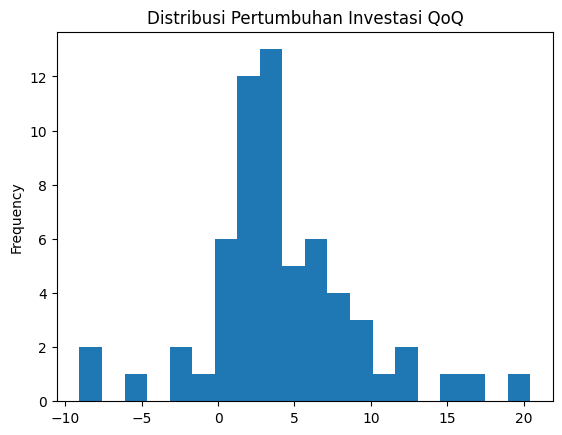

In [ ]:
# Hitung pertumbuhan kuartalan (% change)
df_group['growth_qoq'] = df_group['investment_idr_million'].pct_change() * 100
df_group['growth_qoq'].plot(kind='hist', bins=20, title="Distribusi Pertumbuhan Investasi QoQ")


## Stationarity Check (Uji ADF)

In [ ]:
result = adfuller(df_group['investment_idr_million'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: 3.3674479843405702
p-value: 1.0


Interpretasi:

Hipotesis nol (H0) dari ADF test: data memiliki unit root → data tidak stasioner.

Hipotesis alternatif (H1): data stasioner.

Keputusan: jika p-value < 0.05 → tolak H0 (data stasioner).

Karena p-value = 1.0 (>> 0.05) → kita gagal menolak H0.
Artinya: data TIDAK stasioner.

In [ ]:
# Solusi: Differencing
df_group['diff1'] = df_group['investment_idr_million'].diff()
result = adfuller(df_group['diff1'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -1.4050394437953264
p-value: 0.5798577753997886


In [ ]:
# seasonal differencing (lag=4)
df_group['diff_seasonal'] = df_group['investment_idr_million'].diff(4)
result = adfuller(df_group['diff_seasonal'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -1.0389215208539537
p-value: 0.7388052940244954


In [ ]:
# differencing 1 kali + seasonal differencing (lag=4):
df_group['diff12'] = df_group['investment_idr_million'].diff().diff(4)

from statsmodels.tsa.stattools import adfuller
result = adfuller(df_group['diff12'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -2.579409869005004
p-value: 0.09732793761075542


## Autocorrelation (ACF & PACF)

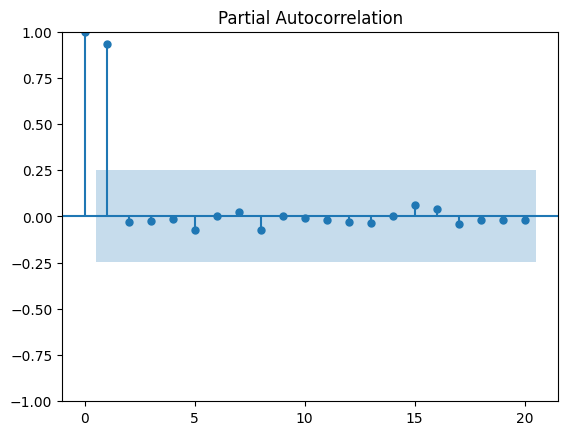

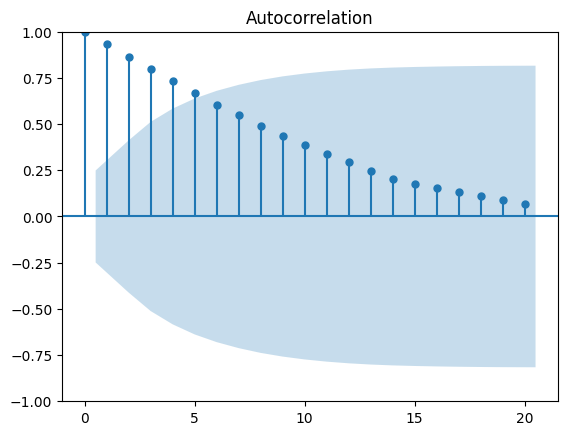

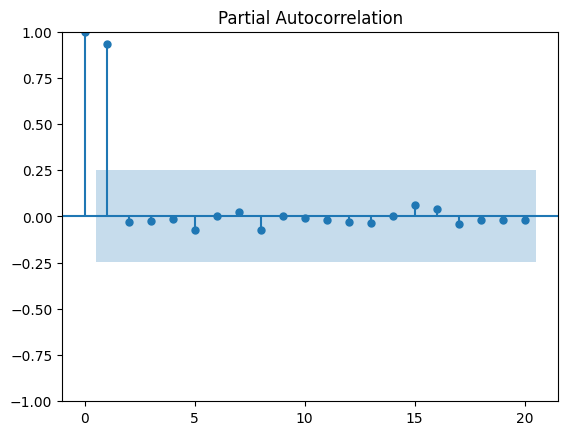

In [ ]:
plot_acf(df_group['investment_idr_million'].dropna(), lags=20)
plot_pacf(df_group['investment_idr_million'].dropna(), lags=20)


# Model Preperation

Setelah reindex: len=62 | NaN=0 | Range: 2010-03-31 → 2025-06-30
Train: 2010-03-31 → 2023-06-30 (n=54)
Test : 2023-09-30 → 2025-06-30 (n=8)
Missing di TRAIN sebelum imputasi: 0
Missing di TEST : 0

=== ADF (TRAIN) ===
[ADF] raw: stat=1.912 | p=0.999
[ADF] diff(1): stat=-5.391 | p=0.000
[ADF] diff(4): stat=-2.255 | p=0.187
[ADF] diff(1)+diff(4): stat=-3.887 | p=0.002


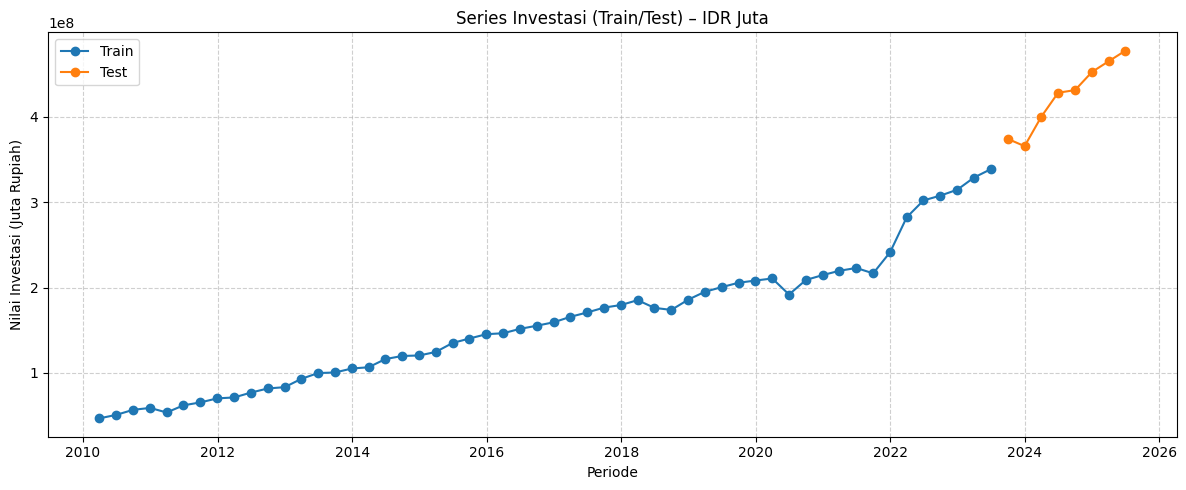

In [ ]:
# 0) Helper
def adf_p(series, name="series"):
    s = pd.Series(series).dropna()
    if len(s) < 12:
        print(f"[ADF] {name} terlalu pendek: {len(s)}"); return np.nan
    from statsmodels.tsa.stattools import adfuller
    stat, p, *_ = adfuller(s)
    print(f"[ADF] {name}: stat={stat:.3f} | p={p:.3f}")
    return p

# 1) Pastikan numerik + (opsional) handle duplikat period
dfp = df_group.copy()

# Robust konversi -> float (aman untuk NaN & koma)
dfp['investment_idr_million'] = pd.to_numeric(
    dfp['investment_idr_million'].astype(str).str.replace(',', ''), errors='coerce'
)

# Jika ada duplikat period → agregasikan (opsional)
# dfp = dfp.groupby('period', as_index=False)['investment_idr_million'].sum()

# 2) Index kuartalan tanpa jam (end-of-quarter)
dfp['date'] = (
    pd.PeriodIndex(dfp['period'].astype(str), freq='Q-DEC')
      .to_timestamp(how='end')
      .normalize()
)
dfp = dfp.set_index('date').sort_index()

# 3) Reindex grid lengkap (kuartalan) TANPA mengisi nilai dulu
full_idx = pd.period_range(
    dfp.index.min().to_period('Q-DEC'),
    dfp.index.max().to_period('Q-DEC'),
    freq='Q-DEC'
).to_timestamp(how='end').normalize()

y_all = dfp['investment_idr_million'].reindex(full_idx)

# Potong ke mulai data valid pertama
first_valid = y_all.first_valid_index()
y_all = y_all.loc[first_valid:]

print(f"Setelah reindex: len={len(y_all)} | NaN={y_all.isna().sum()} "
      f"| Range: {y_all.index.min().date()} → {y_all.index.max().date()}")

# 4) Train–Test split (mis. 8 kuartal terakhir)
TEST_H = 8
if len(y_all) <= TEST_H:
    raise ValueError(f"Data terlalu pendek untuk TEST_H={TEST_H}. Panjang: {len(y_all)}")

y_train_raw = y_all.iloc[:-TEST_H].copy()   # BIARKAN test apa adanya
y_test       = y_all.iloc[-TEST_H:].copy()

print(f"Train: {y_train_raw.index.min().date()} → {y_train_raw.index.max().date()} (n={len(y_train_raw)})")
print(f"Test : {y_test.index.min().date()} → {y_test.index.max().date()} (n={len(y_test)})")
print("Missing di TRAIN sebelum imputasi:", y_train_raw.isna().sum())
print("Missing di TEST :", y_test.isna().sum())

# 5) Imputasi hanya di TRAIN (tanpa mengintip masa depan)
#    - linear interpolate antar titik TRAIN
#    - ffill untuk sisa NaN (ke depan di dalam TRAIN)
#    - bfill untuk NaN di awal TRAIN (opsional)
y_train = (y_train_raw
           .interpolate(method='linear', limit_direction='both')
           .ffill()
           .bfill())

# (Opsional) Capping outlier pakai statistik TRAIN
low, high = y_train.quantile([0.01, 0.99])
y_train = y_train.clip(lower=low, upper=high)

# >>> Penting: JANGAN ffill TEST. Biarkan apa adanya (boleh di-clip saja, atau tampilkan as-is)
# Untuk modelling, kamu boleh clip TEST agar metrik tidak “meledak” oleh outlier:
y_test_model = y_test.clip(lower=low, upper=high)

# 6) ADF di TRAIN saja
print("\n=== ADF (TRAIN) ===")
adf_p(y_train, "raw")
adf_p(y_train.diff(1), "diff(1)")
adf_p(y_train.diff(4), "diff(4)")
p_d1D1 = adf_p(y_train.diff(1).diff(4), "diff(1)+diff(4)")

# Keputusan differencing (contoh)
d, D, m = 1, 1, 4

# 7) Plot cek cepat
plt.figure(figsize=(12,5))
plt.plot(y_train, label='Train', marker='o')
# Untuk plot, tampilkan TEST original (tanpa imputasi) supaya tidak kelihatan “flat karena ffill”
plt.plot(y_test,  label='Test',  marker='o')
plt.title("Series Investasi (Train/Test) – IDR Juta")
plt.xlabel("Periode"); plt.ylabel("Nilai Investasi (Juta Rupiah)")
plt.grid(True, ls='--', alpha=0.6); plt.legend(); plt.tight_layout(); plt.show()


# Machine Learning Model & Evaluate

## Baseline SARIMA + Evaluasi

In [ ]:
# --- Helper untuk MAPE (abaikan pembagi nol bila ada)
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Selaraskan index agar y_pred sesuai urutan y_test
y_hat  = y_pred.reindex(y_test.index) if hasattr(y_pred, "reindex") else y_pred
y_true = y_test.values
y_hat  = np.asarray(y_hat)

def mape_safe(y_true, y_pred):
    y_true = np.asarray(y_true); y_pred = np.asarray(y_pred)
    mask = y_true != 0
    return np.nan if mask.sum()==0 else (np.abs((y_true[mask]-y_pred[mask]) / y_true[mask]).mean() * 100)

mae  = mean_absolute_error(y_true, y_hat)
mse  = mean_squared_error(y_true, y_hat)   # tanpa squared=
rmse = np.sqrt(mse)
mape = mape_safe(y_true, y_hat)

print(f"MAE : {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"MAPE: {mape:.2f}%")

MAE : 18,637,851.98
RMSE: 19,929,006.72
MAPE: 4.32%


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

cands = [((1,1,0),(1,1,0,4)),
         ((0,1,1),(0,1,1,4)),
         ((1,1,1),(0,1,1,4)),
         ((1,1,0),(0,1,1,4))]

best = (np.inf, None, None, None)
for order, seas in cands:
    try:
        mod = SARIMAX(y_train, order=order, seasonal_order=seas,
                      enforce_stationarity=False, enforce_invertibility=False)
        res = mod.fit(disp=False)
        print(f"order={order} seasonal={seas}  AIC={res.aic:.2f}")
        if res.aic < best[0]:
            best = (res.aic, order, seas, res)
    except Exception as e:
        print(order, seas, "→ gagal:", e)

print("\nBest:", best[1], best[2], "AIC=", best[0])
best_res = best[3]
best_pred = best_res.get_forecast(steps=len(y_test)).predicted_mean



order=(1, 1, 0) seasonal=(1, 1, 0, 4)  AIC=1546.82
order=(0, 1, 1) seasonal=(0, 1, 1, 4)  AIC=1509.71
order=(1, 1, 1) seasonal=(0, 1, 1, 4)  AIC=1511.66
order=(1, 1, 0) seasonal=(0, 1, 1, 4)  AIC=1543.25

Best: (0, 1, 1) (0, 1, 1, 4) AIC= 1509.7086219512678


## Diagnostik Residual (cek asumsi model)

Len: 62 | NaN: 0 | Range: 2010-03-31 → 2025-06-30
Train: 2010-03-31 → 2023-06-30 (n=54)
Test : 2023-09-30 → 2025-06-30 (n=8)

=== ADF (TRAIN) ===
[ADF] raw: stat=-2.041 | p=0.269
[ADF] diff(1): stat=-7.316 | p=0.000
[ADF] diff(4): stat=-1.823 | p=0.369
[ADF] diff(1)+diff(4): stat=-3.331 | p=0.014


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:            investment_idr_million   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                  71.176
Date:                           Sat, 13 Sep 2025   AIC                           -132.353
Time:                                   04:47:54   BIC                           -123.547
Sample:                               03-31-2010   HQIC                          -129.105
                                    - 06-30-2023                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5169      0.924      0.559      0.576      -1.295       2.329
ma.L1         -1.9694      3.928     -0.501

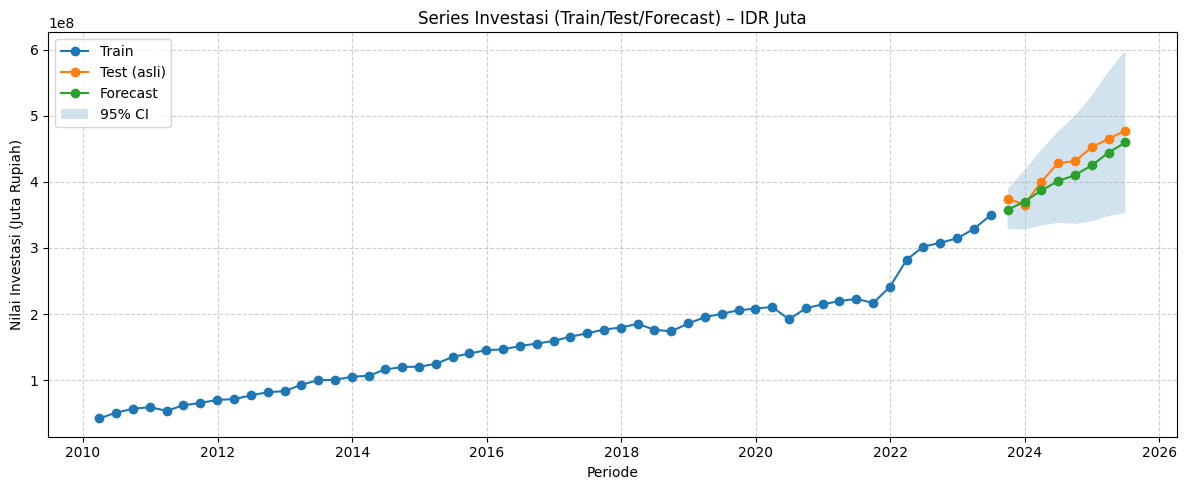

MAE  : 18637851.98
RMSE : 19929006.72
MAPE : 4.32%


In [ ]:
# === IMPORTS ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX

# === HELPER ===
def adf_p(series, name="series"):
    s = pd.Series(series).dropna()
    if len(s) < 12:
        print(f"[ADF] {name} terlalu pendek: {len(s)}"); return np.nan
    stat, p, *_ = adfuller(s)
    print(f"[ADF] {name}: stat={stat:.3f} | p={p:.3f}")
    return p

# ========== 1) SIAPKAN DATA ==========
dfp = df_group.copy()

# pastikan numerik
dfp['investment_idr_million'] = (
    dfp['investment_idr_million'].astype(str).str.replace(',', '', regex=False).astype(float)
)

# jadikan index kuartalan (Q-DEC = Q1=Mar, Q2=Jun, Q3=Sep, Q4=Dec — sesuaikan bila perlu)
dfp['date'] = pd.PeriodIndex(dfp['period'].astype(str), freq='Q-DEC').to_timestamp(how='end').normalize()
y = (dfp.set_index('date')
        .sort_index()['investment_idr_million'])

# reindex grid kuartalan penuh, forward fill TANPA bocor ke masa depan
full_idx = pd.period_range(y.index.min().to_period('Q-DEC'),
                           y.index.max().to_period('Q-DEC'),
                           freq='Q-DEC').to_timestamp(how='end').normalize()
y = y.reindex(full_idx)
y = y.loc[y.first_valid_index():].ffill().asfreq('QE-DEC')

print(f"Len: {len(y)} | NaN: {y.isna().sum()} | Range: {y.index.min().date()} → {y.index.max().date()}")

# ========== 2) TRAIN–TEST SPLIT ==========
TEST_H = 8  # 8 kuartal terakhir
y_train = y.iloc[:-TEST_H].copy()
y_test  = y.iloc[-TEST_H:].copy()
print(f"Train: {y_train.index.min().date()} → {y_train.index.max().date()} (n={len(y_train)})")
print(f"Test : {y_test.index.min().date()} → {y_test.index.max().date()} (n={len(y_test)})")

# ========== 3) (OPSIONAL) WINSORIZATION HANYA UNTUK TRAIN ==========
# Kalau perlu membatasi outlier, TERAPKAN HANYA KE SALINAN TRAIN untuk model fitting.
# JANGAN sentuh y_test agar evaluasi & plot tetap natural.
use_winsor = False  # set True kalau mau
if use_winsor:
    low, high = y_train.quantile([0.01, 0.99])
    y_train_fit = y_train.clip(lower=low, upper=high)
else:
    y_train_fit = y_train

# ========== 4) (OPSIONAL) LOG TRANSFORM ==========
use_log = True  # set False kalau tidak ingin log
if use_log:
    y_train_fit_model = np.log1p(y_train_fit)
    y_train_for_adf   = np.log1p(y_train)  # untuk uji ADF
    y_test_eval       = y_test             # simpan test asli buat evaluasi nanti
else:
    y_train_fit_model = y_train_fit
    y_train_for_adf   = y_train
    y_test_eval       = y_test

# ========== 5) UJI STASIONERITAS DI TRAIN ==========
print("\n=== ADF (TRAIN) ===")
adf_p(y_train_for_adf, "raw")
adf_p(y_train_for_adf.diff(1), "diff(1)")
adf_p(y_train_for_adf.diff(4), "diff(4)")
adf_p(y_train_for_adf.diff(1).diff(4), "diff(1)+diff(4)")

# Keputusan differencing (d=1, D=1, m=4 dari hasilmu)
d, D, m = 1, 1, 4

# ========== 6) FIT SARIMA ==========
# Mulai dengan p,q,P,Q kecil; nanti bisa grid-search/AIC.
order = (1, d, 1)
seasonal_order = (1, D, 1, m)

model = SARIMAX(
    y_train_fit_model,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False
)
res = model.fit(disp=False)
print(res.summary())

# ========== 7) FORECAST & INVERSE TRANSFORM ==========
fc_steps = len(y_test)
fc_log = res.get_forecast(steps=fc_steps)
fc_mean = fc_log.predicted_mean
fc_ci   = fc_log.conf_int()

# inverse log1p bila pakai log
if use_log:
    y_pred = np.expm1(fc_mean).rename("Forecast")
    ci_low = np.expm1(fc_ci.iloc[:, 0])
    ci_up  = np.expm1(fc_ci.iloc[:, 1])
else:
    y_pred = fc_mean.rename("Forecast")
    ci_low = fc_ci.iloc[:, 0]
    ci_up  = fc_ci.iloc[:, 1]

# ========== 8) PLOT TANPA CLIPPING TEST ==========
plt.figure(figsize=(12,5))
plt.plot(y_train, label='Train', marker='o')
plt.plot(y_test_eval, label='Test (asli)', marker='o')
plt.plot(y_pred.index, y_pred.values, label='Forecast', marker='o')
plt.fill_between(y_pred.index, ci_low.values, ci_up.values, alpha=0.2, label='95% CI')
plt.title("Series Investasi (Train/Test/Forecast) – IDR Juta")
plt.xlabel("Periode"); plt.ylabel("Nilai Investasi (Juta Rupiah)")
plt.grid(True, ls='--', alpha=0.6); plt.legend(); plt.tight_layout(); plt.show()

# ========== 9) METRIK EVALUASI SEDERHANA ==========
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(y_true, 1e-9))) * 100

y_pred_eval = y_pred.reindex(y_test_eval.index)
print(f"MAE  : {np.mean(np.abs(y_test_eval - y_pred_eval)):.2f}")
print(f"RMSE : {np.sqrt(np.mean((y_test_eval - y_pred_eval)**2)):.2f}")
print(f"MAPE : {mape(y_test_eval, y_pred_eval):.2f}%")

## Best SARIMA (AIC): Test-Set Forecast & Evaluation

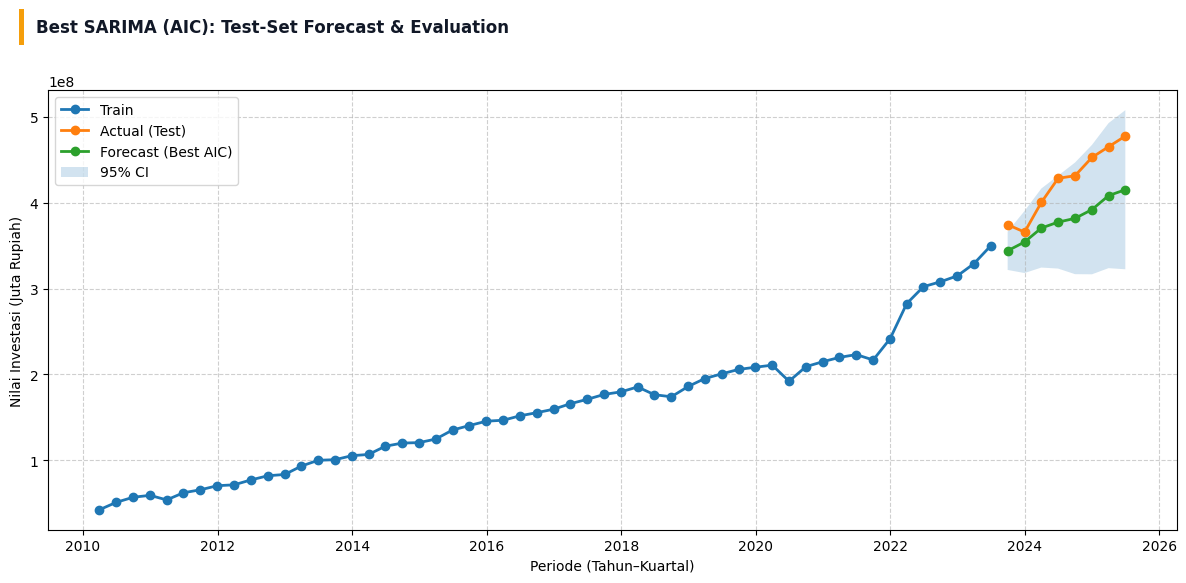

In [ ]:
# --- Plot ---
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_train, label='Train', marker='o', linewidth=2)
ax.plot(y_test_aligned, label='Actual (Test)', marker='o', linewidth=2)
ax.plot(best_yhat.index, best_yhat.values, label='Forecast (Best AIC)', marker='o', linewidth=2)
if conf_low is not None and conf_high is not None:
    ax.fill_between(best_yhat.index, conf_low.values, conf_high.values, alpha=0.2, label='95% CI')

ax.set_xlabel("Periode (Tahun–Kuartal)")
ax.set_ylabel("Nilai Investasi (Juta Rupiah)")
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend()

import matplotlib.patches as patches
title_text = "Best SARIMA (AIC): Test-Set Forecast & Evaluation"

# bar vertikal oranye di kiri judul
bar_x, bar_y, bar_w, bar_h = 0.02, 0.965, 0.004, 0.06
bar = patches.FancyBboxPatch(
    (bar_x, bar_y - bar_h), bar_w, bar_h,
    boxstyle="square,pad=0",
    transform=fig.transFigure,
    facecolor="#f59e0b", edgecolor="none"
)
fig.patches.append(bar)

# teks judul di kanan bar
fig.text(bar_x + bar_w + 0.01, bar_y - bar_h/2,
         title_text, ha="left", va="center",
         fontsize=12, fontweight="bold", color="#111827")

fig.subplots_adjust(top=0.88)
fig.tight_layout(rect=[0, 0, 1, 0.88])


## Future Forecast (mis. 8 kuartal ke depan)


Forecast 8 Kuartal ke Depan (murni future):


,forecast,lower_95,upper_95
2025-09-30,4.854775e+08,4.598332e+08,5.111218e+08
2025-12-31,4.947862e+08,4.566566e+08,5.329158e+08
2026-03-31,5.132011e+08,4.657659e+08,5.606363e+08
2026-06-30,5.273248e+08,4.721312e+08,5.825184e+08
2026-09-30,5.352387e+08,4.695226e+08,6.009547e+08
2026-12-31,5.445474e+08,4.694158e+08,6.196789e+08
2027-03-31,5.629622e+08,4.794703e+08,6.464542e+08
2027-06-30,5.770859e+08,4.859977e+08,6.681742e+08


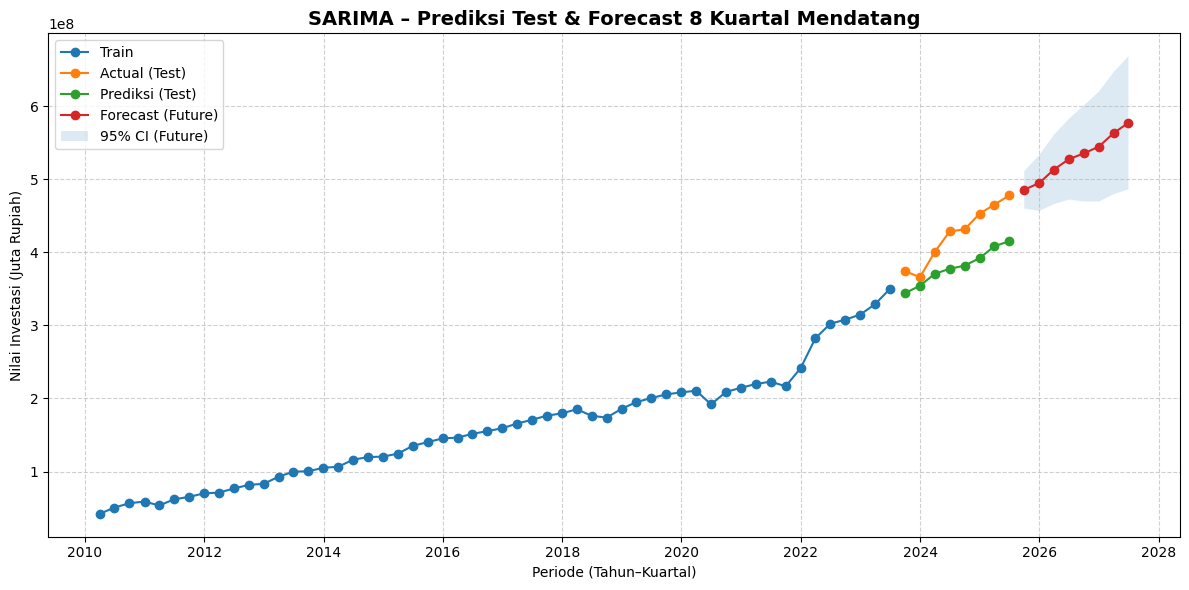

In [ ]:
# === 1) Prediksi untuk periode TEST (evaluasi) ===
pred_test = best_res.get_prediction(start=y_test.index[0], end=y_test.index[-1])
pred_test_mean = pred_test.predicted_mean
pred_test_ci   = pred_test.conf_int()

# === 2) Refit model ke SELURUH data aktual, lalu forecast murni masa depan ===
# Ambil spesifikasi order dari model terbaik yang sudah ada
order          = best_res.model.order
seasonal_order = best_res.model.seasonal_order

model_full = SARIMAX(
    y,
    order=order,
    seasonal_order=seasonal_order,
    enforce_stationarity=False,
    enforce_invertibility=False,
)
res_full   = model_full.fit(disp=False)

n_future = 8  # jumlah kuartal ke depan
fc_future = res_full.get_forecast(steps=n_future)
future_mean = fc_future.predicted_mean
future_ci   = fc_future.conf_int()

# === 3) Tabel hasil masa depan ===
future_df = pd.DataFrame({
    'forecast': future_mean,
    'lower_95': future_ci.iloc[:, 0],
    'upper_95': future_ci.iloc[:, 1],
})
print("\nForecast 8 Kuartal ke Depan (murni future):")
display(future_df)

# === 4) Plot: train/test aktual, prediksi untuk TEST, lalu forecast FUTURE saja ===
plt.figure(figsize=(12,6))

# Aktual
plt.plot(y_train, label='Train', marker='o')
plt.plot(y_test,  label='Actual (Test)', marker='o')

# Prediksi periode test (untuk evaluasi)
plt.plot(pred_test_mean.index, pred_test_mean.values, label='Prediksi (Test)', marker='o')

# Forecast murni masa depan
plt.plot(future_mean.index, future_mean.values, label='Forecast (Future)', marker='o')

# CI hanya untuk masa depan
plt.fill_between(future_ci.index, future_ci.iloc[:,0], future_ci.iloc[:,1],
                 alpha=0.15, label='95% CI (Future)')

plt.title("SARIMA – Prediksi Test & Forecast 8 Kuartal Mendatang", fontsize=14, fontweight='bold')
plt.xlabel("Periode (Tahun–Kuartal)")
plt.ylabel("Nilai Investasi (Juta Rupiah)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

